In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

use color to represent host and use tick to mark architecture

In [187]:
USER_START=0
USER_END=11

In [188]:
dirpath = "/home/thl/edge-cloud-continuum-openfaas/experiment/trigger/result"
hostname_list = [
    "EdgeNode1 LocA", "EdgeNode2 LocA", 
    "EdgeNode1 LocB", "EdgeNode2 LocB", 
    "CloudNode1", "CloudNode2"
]
ip_list = ["192.168.100.105", "192.168.100.102", "192.168.100.103", "192.168.100.111", "145.100.135.86", "145.100.135.99"]
ip_map = {
    "10.202.0.1": "145.100.135.86", 
    "10.202.0.2": "145.100.135.99", 
    "10.202.0.3": "192.168.100.105", 
    "10.202.0.4": "192.168.100.102", 
    "10.202.0.5": "192.168.100.103", 
    "10.202.0.6": "192.168.100.111"
}
col_name = hostname_list + ["User Count", "Architecture"]
user_count_list = [i for i in range(USER_START, USER_END + 1)]
df_plot_metric = pd.DataFrame(columns = col_name)
# arch_list =  ["Centralized", "Federated", "Decentralized"]
arch_list =  ["Decentralized"]
# arch_list = ["Federated"]
metric = "cpu"
for user_cnt in user_count_list:
    for arch in arch_list:
        df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_metrics.csv")
        if arch == "Centralized":
            df["hostname"] = df["hostname"].map(ip_map)
        df.index = df["hostname"]
        df = df.loc[ip_list]
        df_plot_metric.loc[len(df_plot_metric)] = list(df[metric]) + [user_cnt, arch]

In [189]:
sns.set_theme(
    context="paper",
#     style="white",
#     palette=sns.color_palette("Set1", 9, 0.9),
)

https://www.codecademy.com/article/seaborn-design-ii#

In [190]:
palette = sns.color_palette("BrBG", 6, 1)

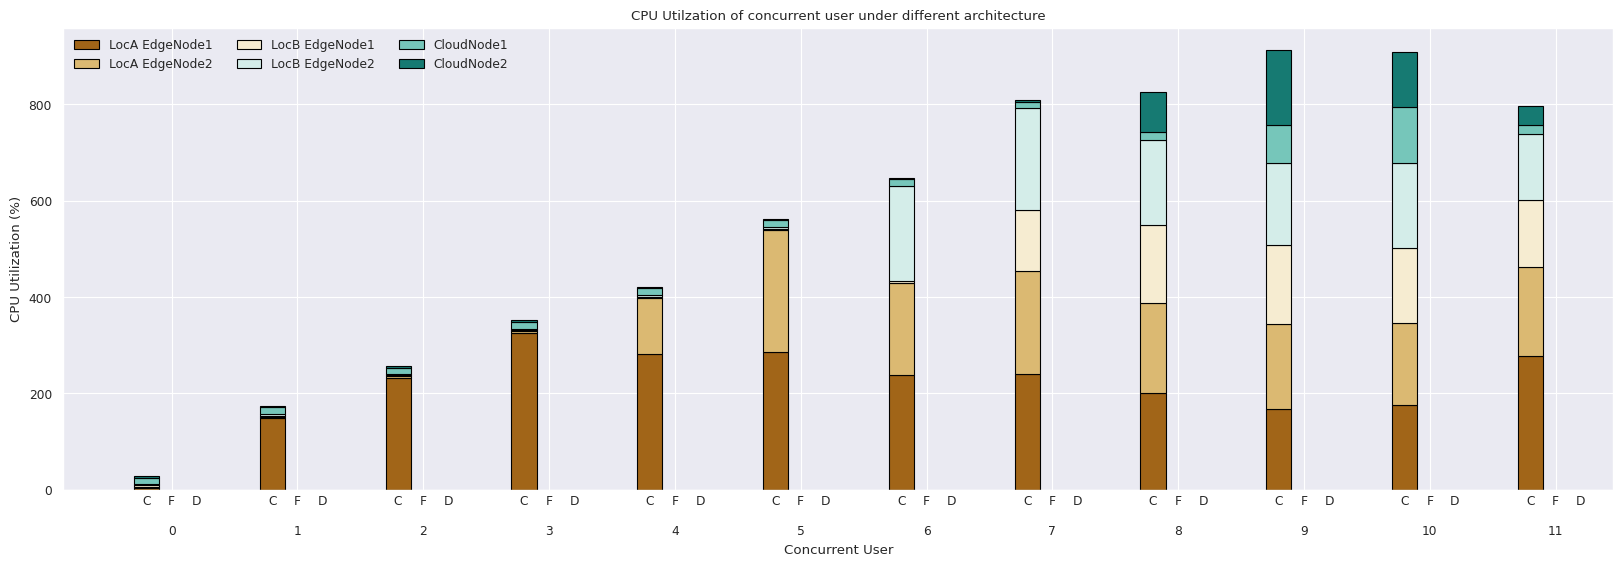

In [191]:
user_count_list = df_plot_metric["User Count"].unique()
arch_list = df_plot_metric["Architecture"].unique()


fig, ax = plt.subplots(figsize = (20, 6))
bar_width = 0.2
patterns = ["/", "o" , "x", "|", "*", "\\" ]
color = ['c', 'm', 'y', 'b', 'k', 'w']
legend = []
for i, arch in enumerate(arch_list):
    bottom = np.zeros(len(user_count_list))
    for j, hostname in enumerate(hostname_list):
        metrics = df_plot_metric[df_plot_metric["Architecture"] == arch][hostname]
        offset = bar_width * i
        plot = ax.bar(
            user_count_list + offset, metrics, width = bar_width, 
            label = hostname, bottom = bottom,
            color = palette[j], edgecolor='black'
        )
        bottom += metrics
        if i == 0:
            legend.append(plot[0])
        
ax.set_title("CPU Utilzation of concurrent user under different architecture")
ax.set_xlabel('Concurrent User')
ax.set_ylabel('CPU Utilization (%)')
# concurrent user
ax.set_xticks(user_count_list + bar_width, labels = [f"\n\n{i}" for i in user_count_list])
ax.tick_params('x', length=0)

# architecture
sec = ax.secondary_xaxis(location=0)
sec.set_xticks(
    [ i + j * bar_width for i in user_count_list for j in range(3)],
    labels = ['C', 'F', 'D'] * len(user_count_list)
)
sec.tick_params('x', length=0)

# line between user
# sec2 = ax.secondary_xaxis(location=0)
# sec2.set_xticks(
#     [ i + j for i in user_count_list for j in [-bar_width/2 , bar_width * 2 + bar_width/2]],
#     labels=[]
# )
# sec2.tick_params('x', length=30, width=1)

# ax.set_ylim(0, 130)
readable_hostname = [
    "LocA EdgeNode1", "LocA EdgeNode2", 
    "LocB EdgeNode1", "LocB EdgeNode2", 
    "CloudNode1", "CloudNode2"
]
ax.legend(legend, readable_hostname, loc='upper left', ncols=3, frameon=False)
plt.show()

memory

In [192]:
dirpath = "/home/thl/edge-cloud-continuum-openfaas/experiment/trigger/result"
hostname_list = [
    "EdgeNode1 LocA", "EdgeNode2 LocA", 
    "EdgeNode1 LocB", "EdgeNode2 LocB", 
    "CloudNode1", "CloudNode2"
]
ip_list = ["192.168.100.105", "192.168.100.102", "192.168.100.103", "192.168.100.111", "145.100.135.86", "145.100.135.99"]
col_name = hostname_list + ["User Count", "Architecture"]
user_count_list = [i for i in range(USER_START, USER_END + 1)]
df_plot_metric = pd.DataFrame(columns = col_name)
# arch_list = ["Federated", "Decentralized"]
arch_list = ["Decentralized"]
metric = "memory"
for user_cnt in user_count_list:
    for arch in arch_list:
        df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_metrics.csv")
        df.index = df["hostname"]
        df = df.loc[ip_list]
        df_plot_metric.loc[len(df_plot_metric)] = list(df[metric]) + [user_cnt, arch]

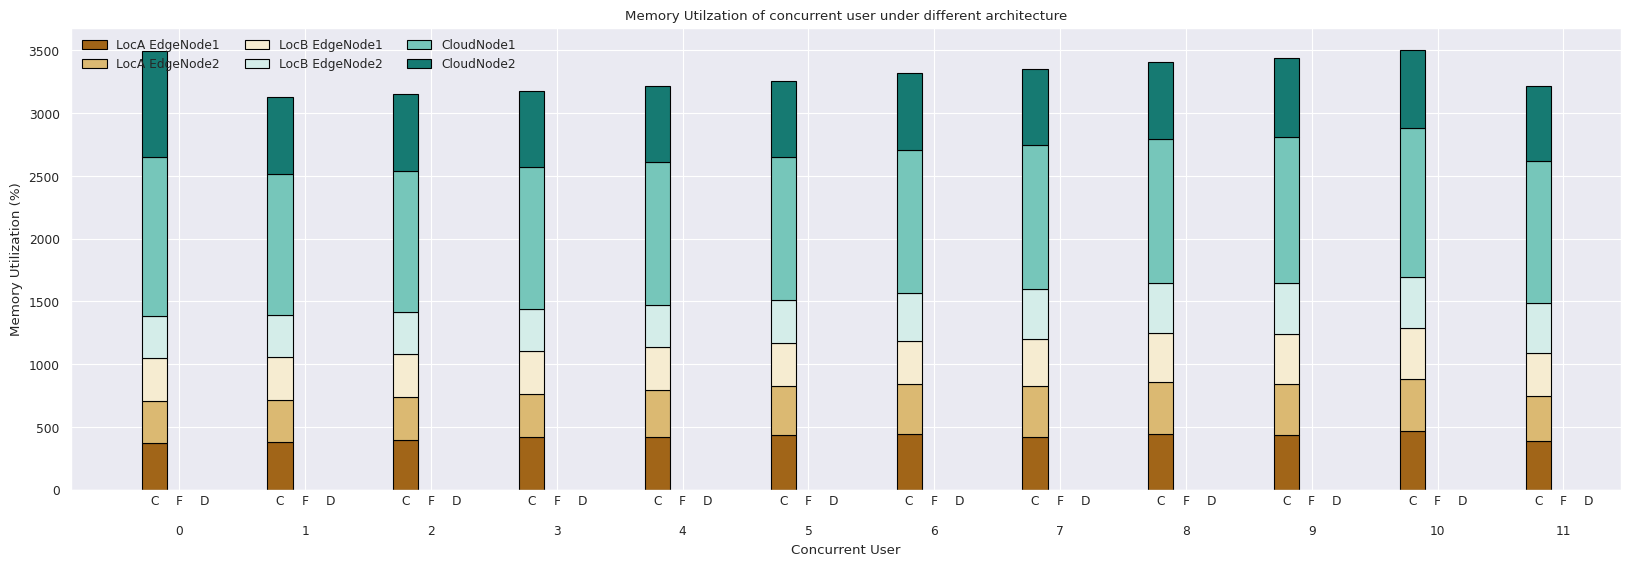

In [193]:
user_count_list = df_plot_metric["User Count"].unique()
arch_list = df_plot_metric["Architecture"].unique()


fig, ax = plt.subplots(figsize = (20, 6))
bar_width = 0.2
patterns = ["/", "o" , "x", "|", "*", "\\" ]
color = ['c', 'm', 'y', 'b', 'k', 'w']
legend = []
for i, arch in enumerate(arch_list):
    bottom = np.zeros(len(user_count_list))
    for j, hostname in enumerate(hostname_list):
        metrics = df_plot_metric[df_plot_metric["Architecture"] == arch][hostname]
        offset = bar_width * i
        plot = ax.bar(
            user_count_list + offset, metrics, width = bar_width, 
            label = hostname, bottom = bottom,
            color = palette[j], edgecolor='black'
        )
        bottom += metrics
        if i == 0:
            legend.append(plot[0])
        
ax.set_title("Memory Utilzation of concurrent user under different architecture")
ax.set_xlabel('Concurrent User')
ax.set_ylabel('Memory Utilization (%)')
# concurrent user
ax.set_xticks(user_count_list + bar_width, labels = [f"\n\n{i}" for i in user_count_list])
ax.tick_params('x', length=0)

# architecture
sec = ax.secondary_xaxis(location=0)
sec.set_xticks(
    [ i + j * bar_width for i in user_count_list for j in range(3)],
    labels = ['C', 'F', 'D'] * len(user_count_list)
)
sec.tick_params('x', length=0)

# line between user
# sec2 = ax.secondary_xaxis(location=0)
# sec2.set_xticks(
#     [ i + j for i in user_count_list for j in [-bar_width/2 , bar_width * 2 + bar_width/2]],
#     labels=[]
# )
# sec2.tick_params('x', length=30, width=1)

# ax.set_ylim(0, 130)
readable_hostname = [
    "LocA EdgeNode1", "LocA EdgeNode2", 
    "LocB EdgeNode1", "LocB EdgeNode2", 
    "CloudNode1", "CloudNode2"
]
ax.legend(legend, readable_hostname, loc='upper left', ncols=3, frameon=False)
plt.show()

# invocation count
should be similar with the resource usage

In [194]:
dirpath = "/home/thl/edge-cloud-continuum-openfaas/experiment/trigger/result"
hostname_list = [
    "LocA EdgeNode",
    "LocB EdgeNode",
    "CloudNode"
]
hostname_ip_map = {"LocA EdgeNode": "192.168.100.105", "LocB EdgeNode": "192.168.100.103", "CloudNode": "145.100.135.86"}
function_name = "floating-point-operation-sine.openfaas-fn"
col_name = hostname_list + ["User Count", "Architecture"]
user_count_list = [i for i in range(USER_START, USER_END + 1)]
df_plot_invocation = pd.DataFrame(columns = col_name)
# arch_list = ["Centralized", "Federated", "Decentralized"]
arch_list = ["Decentralized"]
for user_cnt in user_count_list:
    for arch in arch_list:
        df = pd.read_csv(f"{dirpath}/{arch.lower()}/case{user_cnt}_invocation_count.csv")
        df = df[df["function_name"] == function_name]
        df.index = df["hostname"]
        row_cnt = len(df_plot_invocation)
        df_plot_invocation.loc[row_cnt, ["User Count", "Architecture"]] = [user_cnt, arch]
        for hostname in hostname_list:
            ip = hostname_ip_map[hostname]
            try:
                df_plot_invocation.loc[row_cnt, hostname] = df.loc[ip, "invocation"]
            except:
                df_plot_invocation.loc[row_cnt, hostname] = 0

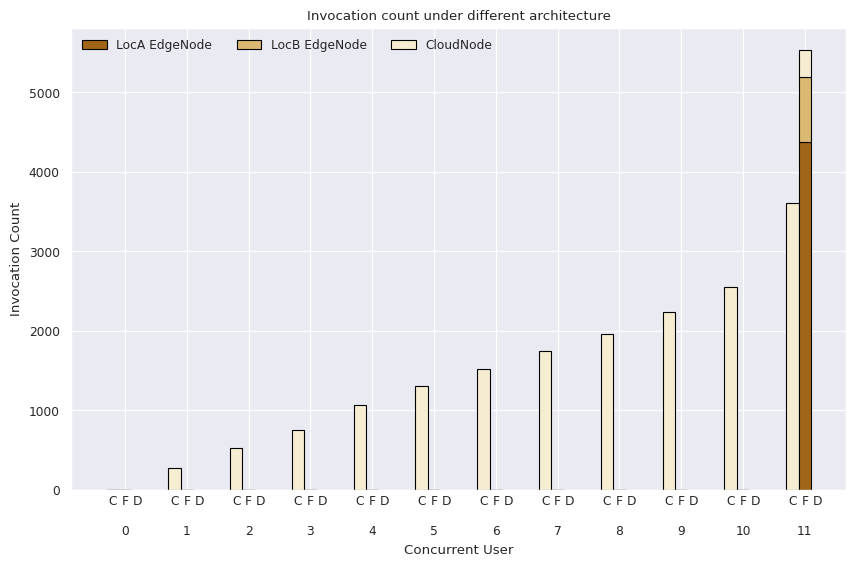

In [195]:
user_count_list = df_plot_invocation["User Count"].unique()
arch_list = df_plot_invocation["Architecture"].unique()


fig, ax = plt.subplots(figsize = (10, 6))
bar_width = 0.2
patterns = ["/", "o" , "x", "|", "*", "\\" ]
color = ['c', 'm', 'y', 'b', 'k', 'w']
legend = []
for i, arch in enumerate(arch_list):
    bottom = np.zeros(len(user_count_list))
    for j, hostname in enumerate(hostname_list):
        metrics = df_plot_invocation[df_plot_invocation["Architecture"] == arch][hostname]
        offset = bar_width * i
        plot = ax.bar(
            user_count_list + offset, metrics, width = bar_width, 
            label = hostname, bottom = bottom,
            color = palette[j], edgecolor='black'
        )
        bottom += metrics
        if i == 0:
            legend.append(plot[0])
        
ax.set_title("Invocation count under different architecture")
ax.set_xlabel('Concurrent User')
ax.set_ylabel('Invocation Count')
# # concurrent user
ax.set_xticks(list(user_count_list + bar_width), labels = [f"\n\n{i}" for i in user_count_list])
# ax.set_xticks(labels = [f"\n\n{i}" for i in user_count_list])
ax.tick_params('x', length=0)

# architecture
sec = ax.secondary_xaxis(location=0)
sec.set_xticks(
    [ i + j * bar_width for i in user_count_list for j in range(3)],
    labels = ['C', 'F', 'D'] * len(user_count_list)
)
sec.tick_params('x', length=0)


ax.legend(legend, hostname_list, loc='upper left', ncols=3, frameon=False)
plt.show()